# K-means

K-means is a clustering algorithm that aims to partition a set of data points into K clusters, where each data point belongs to the cluster with the nearest mean or centroid. The algorithm starts by selecting K random points from the data set as the initial centroids, and then iteratively assigns each data point to the nearest centroid and updates the centroid of each cluster based on the mean of its data points. The algorithm stops when the centroids no longer move or a maximum number of iterations is reached.

K-means is an unsupervised learning algorithm, meaning that it does not require labeled data to train. It is commonly used in data mining, pattern recognition, and image analysis, among other fields. One of the advantages of K-means is its simplicity and efficiency, which makes it suitable for large data sets. However, it has some limitations, such as the sensitivity to the initial centroids and the assumption of the clusters having a spherical shape and equal sizes.


We would use penguin data to illustrate the method.
The dataset contain 8 variables: 
1. species: penguin species (Chinstrap, Adélie, or Gentoo)
2. culmen_length_mm: culmen length (mm)
3. culmen_depth_mm: culmen depth (mm)
4. flipper_length_mm: flipper length (mm)
5. body_mass_g: body mass (g)
6. island: island name (Dream, Torgersen, or Biscoe) in thePalmer. 
7. Archipelago (Antarctica) sex: penguin sex
8. The culmen is “the upper ridge of a bird’s beak”.

In [313]:

import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Perceptron
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [314]:
data = pd.read_csv('/Users/weitaoran/Desktop/rice/inde577/INDE577/unsupervised-learning/k-means/penguins_size.csv')

data['sex'].fillna(data['sex'].mode()[0],inplace=True)
col_to_be_imputed = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
for item in col_to_be_imputed:
    data[item].fillna(data[item].mean(),inplace=True) 

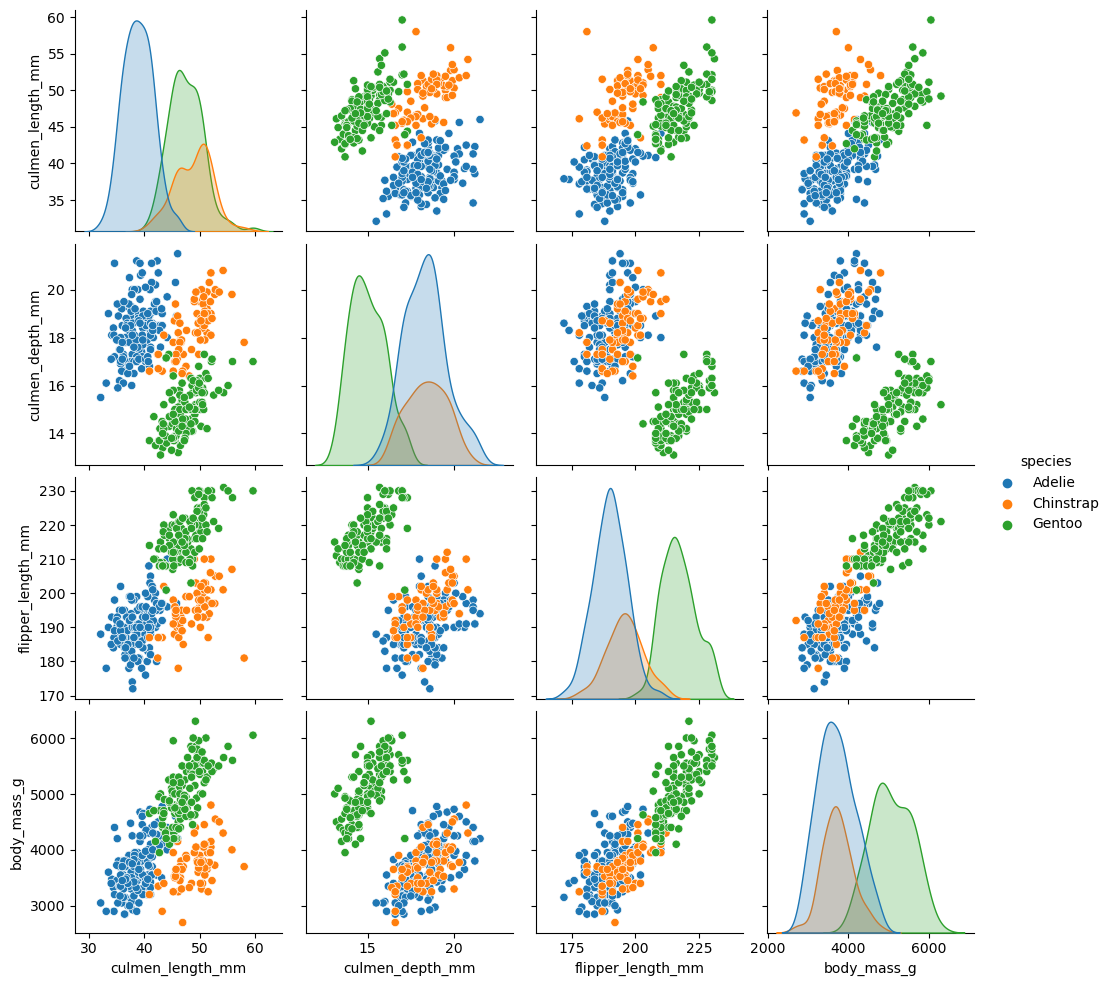

In [315]:
sns.pairplot(data,hue='species')

In [316]:
data[data['sex']=='.']
data.loc[336,'sex'] = 'FEMALE'
data['species']=data['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})
dummies = pd.get_dummies(data[['island','sex']],drop_first=True)
df_to_be_scaled = data.drop(['island','sex'],axis=1)
target = df_to_be_scaled.species
df_feat= df_to_be_scaled.drop('species',axis=1)

In [317]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [318]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_feat)
df_scaled = scaler.transform(df_feat)
df_scaled = pd.DataFrame(df_scaled,columns=df_feat.columns[:4])
df_preprocessed = pd.concat([df_scaled,dummies,target],axis=1)
df_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE,species
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,0,1,1,0
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,0,1,0,0
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,0,1,0,0
3,1.307172e-15,1.806927e-15,0.000000,0.000000,0,1,1,0
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,0,1,0,0


We only look at 'culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g'

In [357]:
X1 = data[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].to_numpy()


In [ ]:
class k_means_clustering():
    def __init__(self, k = 3, max_iter = 100, epsilon = 0.01) -> None:
        self.X = None
        self.k = k
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.centroid_history = None
        self.final_centroids = None

    def fit(self, X):
        self.X = X
        C_old = self.initialize_centroids()
        C_new = self.new_centroids(C_old)
        self.centroid_history = [C_old, C_new]
        centroid_distances = [self.distance(p[0], p[1]) for p in zip(C_old, C_new)]

        iter = 0
        while max(centroid_distances) > self.epsilon and iter<self.max_iter:
            C_old, C_new = C_new, self.new_centroids(C_new)
            self.centroid_history.append(C_new)
            centroid_distances = [self.distance(p[0], p[1]) for p in zip(C_old, C_new)]
            iter += 1
        self.final_centroids = C_new

    def initialize_centroids(self):
        centroids = []
        for _ in range(self.k):
            i = np.random.randint(len(self.X))
            centroids.append(self.X[i, :])
        return centroids

    def new_centroids(self, centroids):
        new_centroids = []
        A = self.make_classes(centroids)
        for i in range(len(centroids)):
            if len(A[i])>0:
                new_centroids.append(1/len(A[i])*sum(A[i])) 
        return new_centroids
    def distance(self, a, b):
        return np.sqrt((a-b)@(a-b))

    def clustering(self, x, centroids):
        distances = np.array([self.distance(x, centroid) for centroid in centroids])
        return np.argmin(distances)

    def make_classes(self, centroids):
        A = dict()
        for i in range(len(centroids)):
            A[i] = []
        for x in self.X:
            A[self.clustering(x, centroids)].append(x)
        return A

    def predict_classes(self, data, centroids):
        A = dict()
        for i in range(len(centroids)):
            A[i] = []
        for x in data:
            A[self.clustering(x, centroids)].append(x)
        return A
    
    def mse_classes(self, centroids):
        errors = []
        A_classes = self.make_classes(centroids)
        for i, centroid in enumerate(centroids):
            error = sum(.5*(centroid-a)@(centroid-a) for a in A_classes[i])
            errors.append(error)
        return sum(errors)

Set  k=2 as the initial centroids, iterate the centroids until stable, measure the errors and plot the data with K-Mean Clustering.

In [368]:
k_means = k_means_clustering(k=2, max_iter=100, epsilon=0.01)
k_means.fit(X1)
centroids = k_means.final_centroids
print(centroids)

[array([  47.18195489,   15.7       ,  214.78947368, 5060.90225564]), array([  41.86703251,   18.06588786,  192.16981237, 3660.20620271])]


In [369]:
mse = k_means.mse_classes(centroids)
print(f"The MSE of points around two centroids is: {round(mse, 3)}.")

The MSE of points around two centroids is: 29644624.159.


The MSE looks very large. We would try more k to see whether there is difference. 

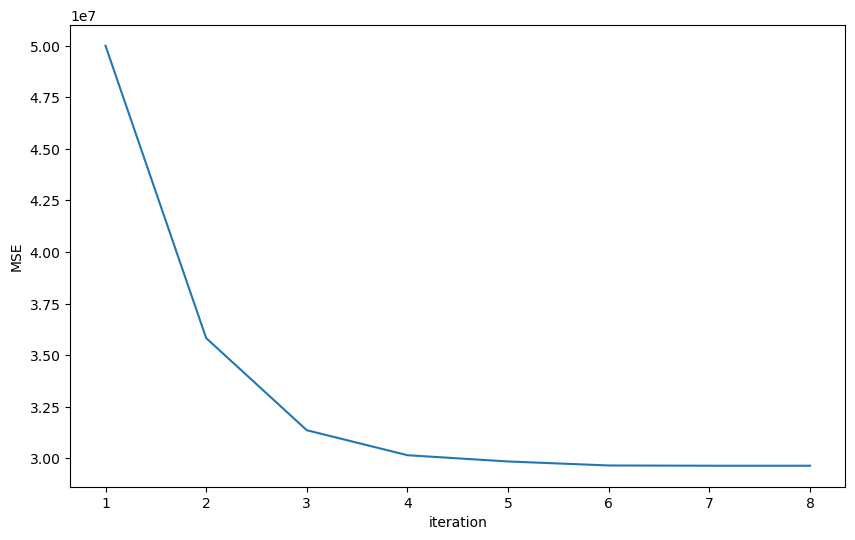

In [367]:
errors = [k_means.mse_classes(centroid) for centroid in k_means.centroid_history]
# errors
plt.figure(figsize=(10,6))
plt.plot([i for i in range(1,len(errors)+1)], errors)
plt.xlabel('iteration')
plt.ylabel("MSE")
plt.show()

In [381]:
k_means = k_means_clustering(k=500, max_iter=100, epsilon=0.01)
k_means.fit(X1)
centroids = k_means.final_centroids

In [382]:
mse = k_means.mse_classes(centroids)
print(f"The MSE of points around two centroids is: {round(mse, 3)}.")

The MSE of points around two centroids is: 5679.824.


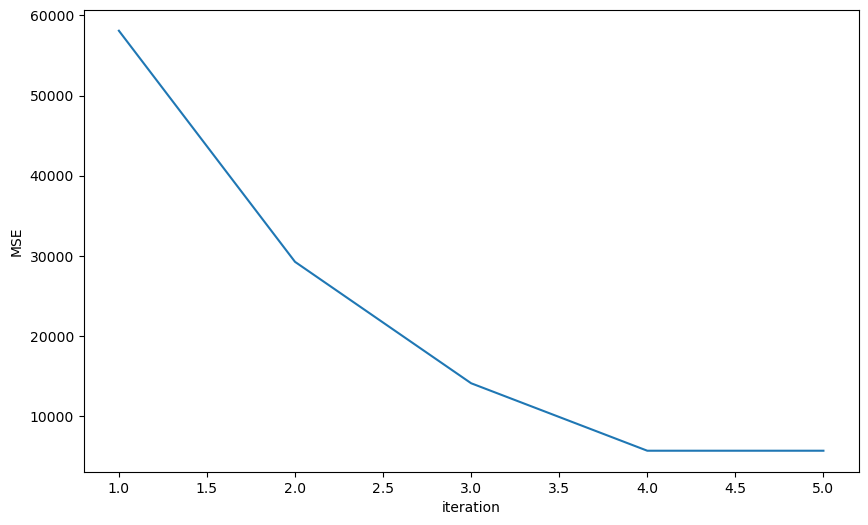

In [383]:
errors = [k_means.mse_classes(centroid) for centroid in k_means.centroid_history]
# errors
plt.figure(figsize=(10,6))
plt.plot([i for i in range(1,len(errors)+1)], errors)
plt.xlabel('iteration')
plt.ylabel("MSE")
plt.show()

We see as K increases, MSE keep decreasing. The larger the increase in k, the smaller the MSE. Larger K would appropriate for penguin dataset. 